# Problema: Caxeiro viajante

Solução baseada em: 
 * https://github.com/DEAP/deap/blob/master/examples/ga/tsp.py
 * http://deap.readthedocs.io/en/master/overview.html
 * https://github.com/DEAP/notebooks/blob/master/OneMax.ipynb
 * http://conteudo.icmc.usp.br/pessoas/andre/research/genetic/

## Mapa

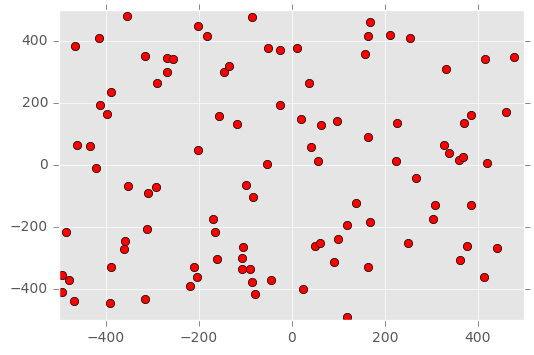

In [1]:
import random

posicao = lambda: int(random.random()*1000 - 500)

Mapa = map(lambda i: (posicao(), posicao()), range(100))
Mapa = list(Mapa)
Mapa


x = list(map(lambda e: e[0], Mapa))
y = list(map(lambda e: e[1], Mapa))

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

plt.plot(x, y, 'ro')
plt.axis([-500, 500, -500, 500])
plt.show()

## Indivíduo

Um indivíduo é composto por uma lista de índices das posições do mapa. Na biblioteca utilizada, é necessário também informar como se dará a seleção de fitness. No nosso caso, é necessário um _Fitness mínimo_: um menor caminho é o desejado.

In [2]:
from deap import base, creator

# Criando tipos
#  http://deap.readthedocs.io/en/master/tutorials/basic/part1.html

# "creator" cria uma classe
#  name = Nome da classe
#  base = classe que a classe criada herdará
#  weights=(-1.0,): Minimizar primeiro atributo
#  weights=(-1.0, 1.0): Minimiza primeiro atributo, maximiza segundo atributo

# Função de avaliação fitness
creator.create(name="FitnessMinimo", base=base.Fitness, weights=(-1.0,))
creator.create(name="Individuo", base=list, fitness=creator.FitnessMinimo)

#################
# Exemplo
#################

print("Exemplo de indivíduo")
individuo = creator.Individuo([0, 1, 2, 3, 4])

print(individuo, type(individuo))

Exemplo de indivíduo
[0, 1, 2, 3, 4] <class 'deap.creator.Individuo'>


In [3]:
import random
from deap import tools

TAMANHO_INDIVIDUO = len(Mapa)

toolbox = base.Toolbox()

# Attribute generator
# random.sample: obtém os n únicos indivíduos da lista m
# onde:
#  n = TAMANHO_INDIVIDUO
#  m = lista de [0..TAMANHO_INDIVIDUO)
toolbox.register("indices", random.sample, range(TAMANHO_INDIVIDUO), TAMANHO_INDIVIDUO)

# Inicializador de estrutura
#  toolbox.individuo() consegue gerar deap.creator.Individuo através do generator=toolbox.indices
#  container = Tipo dos individuos a serem gerados
toolbox.register("individuo", tools.initIterate, container=creator.Individuo, generator=toolbox.indices)
toolbox.register("populacao", tools.initRepeat, list, toolbox.individuo)


#################
# Exemplo
#################

individuo = toolbox.individuo()
populacao = toolbox.populacao(n=3)

print("individuo é do tipo %s e contém %d elementos (genes)\n%s" % (type(individuo), len(individuo), individuo))
print("populacao é do tipo %s e contém %d indivíduos\n%s" % (type(populacao), len(populacao), populacao))

individuo é do tipo <class 'deap.creator.Individuo'> e contém 100 elementos (genes)
[92, 26, 94, 75, 66, 85, 64, 99, 87, 16, 77, 51, 9, 42, 13, 4, 35, 50, 24, 6, 44, 39, 63, 43, 73, 53, 7, 67, 56, 40, 0, 1, 25, 86, 98, 2, 8, 37, 74, 3, 96, 36, 65, 5, 33, 81, 21, 61, 91, 28, 79, 90, 68, 10, 23, 20, 30, 38, 49, 46, 84, 76, 54, 58, 12, 69, 17, 62, 41, 71, 18, 88, 32, 83, 19, 11, 78, 72, 47, 82, 34, 60, 59, 97, 45, 55, 93, 14, 70, 57, 22, 27, 95, 15, 80, 29, 52, 89, 48, 31]
populacao é do tipo <class 'list'> e contém 3 indivíduos
[[58, 67, 9, 18, 92, 95, 97, 60, 56, 17, 48, 22, 62, 87, 42, 6, 77, 82, 19, 73, 32, 51, 50, 24, 54, 13, 5, 4, 59, 81, 34, 23, 63, 88, 61, 33, 98, 30, 36, 72, 27, 53, 86, 45, 71, 57, 14, 12, 79, 91, 89, 68, 0, 15, 41, 94, 10, 83, 7, 70, 25, 44, 29, 39, 47, 20, 64, 85, 1, 37, 11, 66, 90, 84, 46, 35, 99, 69, 21, 75, 74, 3, 43, 93, 40, 38, 55, 31, 52, 65, 2, 8, 96, 28, 49, 16, 80, 78, 26, 76], [92, 4, 51, 78, 60, 10, 46, 52, 99, 62, 20, 30, 79, 7, 45, 12, 44, 64, 40, 

## Função para avaliacao de fitness

A função para a avaliação de um indivíduo calcula a distância euclidiana de percorrer os elementos da lista. Ou seja, para uma lista com os índices $[1, 2, 0]$, a função retornará as somas das distância euclidianas do ponto $1$ ao ponto $2$, do ponto $2$ ao ponto $0$ e, do retorno (do ponto $0$ ao ponto $2$).

In [4]:
import math

def distancia_euclidiana(a, b):
    return math.sqrt((a[0]-b[0])**2 + (a[1]-b[1])**2)

def funcao_avaliadora(individuo):
    distancia = 0
    
    for gene1, gene2 in zip(individuo[0:-1], individuo[1:]):
        gene1 = Mapa[gene1]
        gene2 = Mapa[gene2]
        
        distancia += distancia_euclidiana(gene1, gene2)
    
    # Voltar para o caminho inicial
    gene1 = Mapa[0]
    gene2 = Mapa[-1]
    distancia += distancia_euclidiana(gene1, gene2)
    
    return distancia,

print("Função avaliadora para: [0, 1, 2, 3, 4]")
print(funcao_avaliadora([0, 1, 2, 3, 4]))

toolbox.register("evaluate", funcao_avaliadora)

Função avaliadora para: [0, 1, 2, 3, 4]
(3067.7514638424564,)


## Mutação

Foi utilizado para a mutação `tools.mutShuffleIndexes`, que gera um mutante a partir de um indivíduo fazendo um _shuffle_ (alterando a ordem) nos atributos do indivíduo.

É necessário especificar também a probabilidade de realizar um _shuffle_ em cada elemento (atributo *indpb*). A probabilidade escolhida foi $0.05$.

In [5]:
# Função de mutação: tools.mutShuffleIndexes
#  Faz um shuffle (troca dois elementos da lista)
#  indpb= probabilidade de ocorrer um shuffle
individuo = creator.Individuo(range(10))
probabilidade = 0.20

print('Individuo:', individuo)
print('Probabilidade:', probabilidade)
print('Resultado:', tools.mutShuffleIndexes(individuo, indpb=probabilidade))

toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.05)

Individuo: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Probabilidade: 0.2
Resultado: ([0, 2, 7, 4, 3, 5, 6, 1, 8, 9],)


## Seleção

In [6]:
toolbox.register("select", tools.selTournament, tournsize=3)

## Cruzamento

In [7]:
toolbox.register("mate", tools.cxPartialyMatched)

# Execução

In [8]:
def main():
    populacao = toolbox.populacao(n=50)
    NUMERO_GERACOES = 40
    PROBABILIDADE_MUTACAO = 0.2
    PROBABILIDADE_CRUZAMENTO = 0.5

    # Aplicar função de fitness para cada indivíduo
    fitnesses = map(toolbox.evaluate, populacao)
    for individuo, fitness in zip(populacao, fitnesses):
        individuo.fitness.values = fitness

    for geracao in range(NUMERO_GERACOES):
        # Selecionar os indivíduos da próxima geração
        descendentes = toolbox.select(populacao, len(populacao))
        # Clonar os indivíduos selecionados
        descendentes = list(map(toolbox.clone, descendentes))

        # Aplicar crossover nos individuos selecionados
        pares = descendentes[::2]
        impares = descendentes[1::2]
        
        for filho1, filho2 in zip(pares, impares):
            if random.random() < PROBABILIDADE_CRUZAMENTO:
                toolbox.mate(filho1, filho2)
                del filho1.fitness.values
                del filho2.fitness.values

        # Aplicar mutação nos individuos selecionados
        for mutant in descendentes:
            if random.random() < PROBABILIDADE_MUTACAO:
                toolbox.mutate(mutant)
                del mutant.fitness.values

        # Avaliar os indivíduos que não foram avaliados (invalid fitness)
        # Ou seja, aqueles que:
        #  * sofreram mutação
        #  * filhos de cruzamento
        
        #individuos_invalidos = [individuo for individuo in descendentes if not individuo.fitness.valid]
        individuos_nao_avaliados = filter(lambda individuo: not individuo.fitness.valid, descendentes)
        
        fitnesses = map(toolbox.evaluate, individuos_nao_avaliados)
        for individuo, fitness in zip(individuos_nao_avaliados, fitnesses):
            individuo.fitness.values = fitness

        # The population is entirely replaced by the offspring
        populacao[:] = descendentes

    return populacao

a = main()
a

[[4,
  30,
  66,
  75,
  52,
  27,
  72,
  56,
  68,
  35,
  9,
  89,
  43,
  37,
  42,
  60,
  14,
  88,
  28,
  79,
  91,
  76,
  99,
  26,
  11,
  41,
  69,
  0,
  94,
  29,
  64,
  5,
  48,
  21,
  81,
  19,
  25,
  84,
  65,
  97,
  87,
  34,
  47,
  31,
  61,
  85,
  58,
  46,
  12,
  59,
  82,
  40,
  32,
  39,
  3,
  22,
  63,
  70,
  17,
  49,
  86,
  92,
  71,
  95,
  1,
  51,
  44,
  93,
  74,
  13,
  18,
  53,
  33,
  62,
  98,
  20,
  23,
  24,
  67,
  73,
  6,
  2,
  15,
  50,
  10,
  45,
  7,
  77,
  38,
  96,
  36,
  16,
  54,
  55,
  8,
  78,
  80,
  83,
  57,
  90],
 [4,
  30,
  66,
  75,
  52,
  27,
  72,
  56,
  68,
  35,
  9,
  89,
  43,
  37,
  42,
  60,
  14,
  88,
  28,
  79,
  91,
  76,
  99,
  26,
  11,
  41,
  69,
  0,
  94,
  29,
  64,
  5,
  48,
  21,
  81,
  19,
  25,
  84,
  65,
  97,
  87,
  34,
  47,
  31,
  61,
  85,
  58,
  46,
  12,
  59,
  82,
  40,
  32,
  39,
  3,
  22,
  63,
  70,
  17,
  49,
  86,
  92,
  71,
  95,
  1,
  51,
  44,
  93,
  74,
 

gen	nevals	avg    	min    	max    
0  	500   	51569.4	44736.1	57346.5
1  	298   	50349.6	44354.1	55933.4
2  	275   	49418.1	44150.5	55984.1
3  	316   	48788.8	43905.6	55236.6
4  	308   	48404.6	43905.6	56019.5
5  	291   	47878.2	44046.7	54728.8
6  	308   	47690.5	43363.5	55848.8
7  	307   	47374.6	43363.5	55847.7
8  	303   	47122.2	43119.7	55682.2
9  	312   	46807.2	42033.9	56356.3
10 	299   	46400.6	42217.9	55120.5
11 	315   	46025.5	41680.2	54825.1
12 	299   	45548.8	39610.7	55787.2
13 	320   	45283.3	39744.4	55207  
14 	327   	44979.8	40800  	56186.6
15 	295   	44545.2	40033.1	52964.2
16 	317   	44050.9	39698  	53163.1
17 	309   	43971.4	39549.3	54542  
18 	303   	43471  	39299.4	53753.9
19 	298   	43269.8	38459.8	55128.1
20 	290   	42282.8	38456.5	53834.7
21 	284   	41690.1	38249  	54848.5
22 	329   	41301.4	37886  	52836.6
23 	307   	40902.7	37177.9	55284.1
24 	316   	40343.9	37233.9	51001.2
25 	302   	39757.6	36787.4	49613.7
26 	316   	39109.9	36787.4	48861.4
27 	306   	38699.6	3

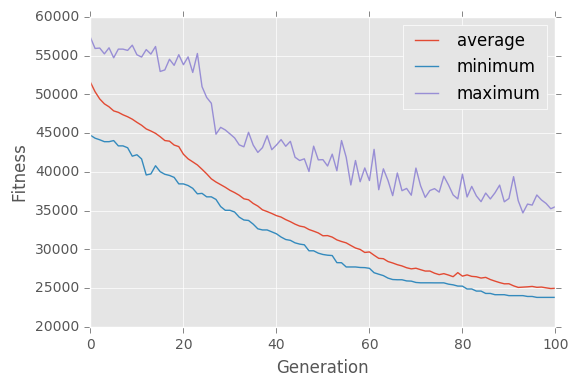

In [9]:
from deap import algorithms
toolbox.register("population", tools.initRepeat, list, toolbox.individuo)

def xd():
    import numpy
    
    pop = toolbox.population(n=500)
    hof = tools.HallOfFame(1)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", numpy.mean)
    stats.register("min", numpy.min)
    stats.register("max", numpy.max)
    
    populacao, logbook = algorithms.eaSimple(
        pop,
        toolbox,
        cxpb=0.5,
        mutpb=0.2,
        ngen=100,
        stats=stats,
        halloffame=hof,
        verbose=True
    )
    
    return algorithms, logbook, hof

pop, log, hof = xd()
print("Best individual is: %s\nwith fitness: %s" % (hof[0], hof[0].fitness))

import matplotlib.pyplot as plt
gen, avg, min_, max_ = log.select("gen", "avg", "min", "max")
plt.plot(gen, avg, label="average")
plt.plot(gen, min_, label="minimum")
plt.plot(gen, max_, label="maximum")
plt.xlabel("Generation")
plt.ylabel("Fitness")
plt.legend(loc="best")
plt.show()